# Multi-Channel Pulses

Usually there is a need to define pulses for multiple control channels simulateously. While this would be possible by simply defining several separate pulse templates (one for each channel), the `qctoolkit` also allows to define pulse templates directly for multiple channels or combine existing templates in a multi-channel way. This tutorial explores these possibilities.

## A Multi-Channel Table Pulse
`TablePulseTemplate` allows to model multiple channels in a straighforward way: In its constructor entries are given as time-voltage sequences in a dictionary where each key specifies a channel id (which can be an identifier string or a number). In the first few examples we have mostly ignored this but here we are making use of it.

The following example constructs a 2-channel table pulse template with shared parameters and plots it.

<IPython.core.display.Javascript object>


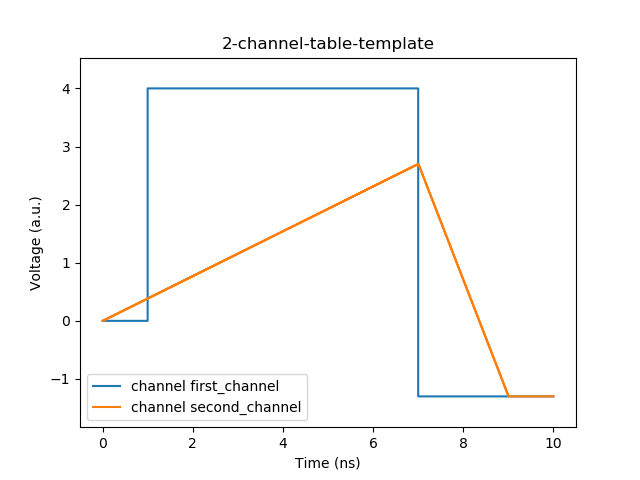

The number of channels in table_template is 2.


In [1]:
from qctoolkit.pulses import TablePT

table_template = TablePT(identifier='2-channel-table-template',
                         entries={'first_channel' : [(0, 0),
                                                     (1, 4),
                                                     ('foo', 'bar'),
                                                     (10, 0)],
                                  'second_channel': [(0, 0),
                                                     ('foo', 2.7, 'linear'),
                                                     (9, 'bar', 'linear')]}
                        )

# plot it
%matplotlib notebook
from qctoolkit.pulses.plotting import plot
parameters = dict(
    foo=7,
    bar=-1.3
)
_ = plot(table_template, parameters, sample_rate=100)
print("The number of channels in table_template is {}.".format(table_template.num_channels))

# Combining Templates: `AtomicMultiChannelPulseTemplate`

`AtomicMultiChannelPulseTemplate`(`AtomicMultiChannelPT`) allows to compose a multi-channel template out of atomic (i.e., no control flow) templates of equal duration. It allows to reassign channel indices of the channels of its subtemplates. The constructor is similar to the one of `SequencePulseTemplate` and expects subtemplates (including parameter and channel mappings if required).

The following example will combine the two-channel table pulse template `table_template` from above and a function pulse template `function_template` to a three-channel template `template`. We reassign indices such that channel 'rectangle' of the new `template` is channel 'first_channel' and 'triangle' is channel 'second_channel' of `table_template`. Furthermore the parameters get remapped. `function_template` doesn't get changed at all.

<IPython.core.display.Javascript object>


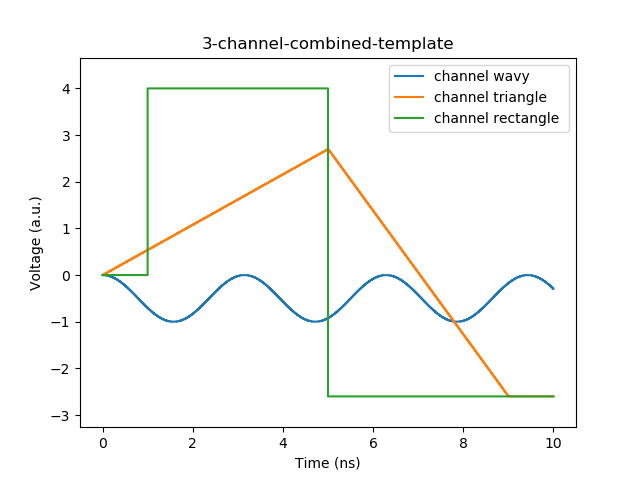

The number of channels in function_template is 1.
The number of channels in template is 3.


In [2]:
from qctoolkit.pulses import FunctionPT, AtomicMultiChannelPT

function_template = FunctionPT('-sin(t)**2', '10', identifier='function-template', channel='wavy')

template = AtomicMultiChannelPT(
    function_template,
    (table_template, dict(foo='5', bar='2 * hugo'), {'first_channel': 'rectangle ', 'second_channel': 'triangle'}),
    identifier='3-channel-combined-template'
)

_ = plot(template, dict(hugo=-1.3), sample_rate=100)
print("The number of channels in function_template is {}.".format(function_template.num_channels))
print("The number of channels in template is {}.".format(template.num_channels))

The constructor of `AtomicMultiChannelPulseTemplate` expects its subtemplates as positional arguments. Each of positional arguments is required to be either a `AtomicPulseTemplate`, a `MappingPulseTemplate` that wraps an `AtomicPulseTemplate` or a tuple that can be passed to `MappingPulseTemplate.from_tuple`(more examples in [Mapping with the MappingPulseTemplate](05MappingTemplate.ipynb)). The sets of channels on which the subtemplates are defined has to be distinct.
Note that an exception will be raised during the sampling of the waveforms (i.e., during the sequencing process) if the subtemplates have different length.

## Multiple Channels in Non-Atomic Templates

All higher order template, i.e., `SequencePulseTemplate` and `ForLoopPulseTemplate` and `RepetitionPulseTemplate`, also support multiple channels insofar as that they can be composed using multi-channel atomic templates as subtemplates. They require that all these subtemplates define the same channels and raise an exception if that is not the case. The following example constructs a `SequencePulseTempate` `sequence_template` by chaining the above defined two-channel `table_template`. In the second instance of `table_template` in the sequence, we swap the channels by wrapping a `MappingPulseTemplate` around it.

<IPython.core.display.Javascript object>


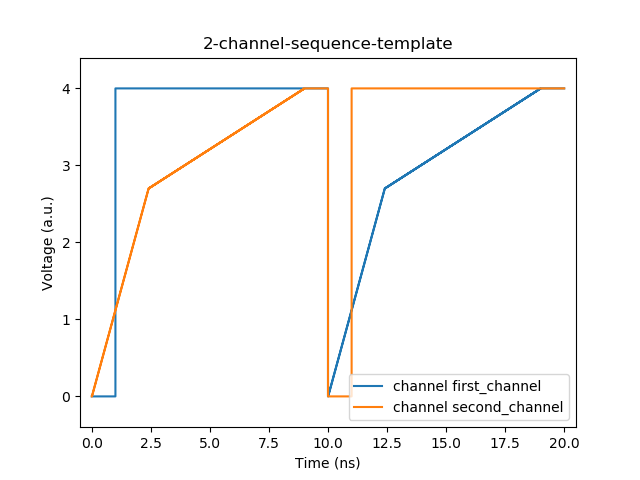

The number of channels in sequence_template is 2.


In [3]:
from qctoolkit.pulses import SequencePT

sequence_template = SequencePT(
    (table_template, dict(foo='1.2 * hugo', bar='hugo ** 2')),
    (table_template, dict(foo='1.2 * hugo', bar='hugo ** 2'), {'first_channel': 'second_channel', 
                                                               'second_channel': 'first_channel'}),
    identifier='2-channel-sequence-template'
)

plot(sequence_template, dict(hugo=2), sample_rate=100)
print("The number of channels in sequence_template is {}.".format(sequence_template.num_channels))